In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pywt import wavedec

## Preprocessing

In [22]:
csv_uri = '../Preprocessing/db2/data_mfccDWTcqtdb2L2.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-288.786926,42.296764,-82.615433,-52.794029,-15.782209,-4.145738,-3.906438,-9.584704,-13.064323,...,0.007559,0.013211,0.016807,0.025641,0.027299,0.026677,0.030398,0.035489,0.029816,MR
1,../data/DWT/MR/New_MR_174.wav,-245.481262,-9.159161,-86.598175,-37.547234,-24.087418,-17.741518,5.331923,4.329950,1.060180,...,0.014480,0.012928,0.015313,0.018491,0.020200,0.021404,0.022298,0.020273,0.017308,MR
2,../data/DWT/MR/New_MR_182.wav,-245.819580,-12.206548,-91.458351,-34.625580,-31.203762,-20.011663,1.225276,2.933501,-2.162452,...,0.014065,0.015337,0.013073,0.023230,0.022665,0.022815,0.025617,0.019447,0.015945,MR
3,../data/DWT/MR/New_MR_005.wav,-298.839111,53.727386,-56.727642,-46.378490,-20.676960,-17.400682,-16.789209,-9.214540,-9.898888,...,0.017676,0.016788,0.016758,0.010805,0.011208,0.013173,0.014919,0.013135,0.013357,MR
4,../data/DWT/MR/New_MR_067.wav,-246.515976,-10.436733,-89.159042,-31.395521,-30.606253,-14.468124,2.806366,8.215012,1.335910,...,0.012028,0.013920,0.013825,0.016490,0.024554,0.020875,0.020908,0.017670,0.015281,MR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,../data/DWT/MVP/New_MVP_116.wav,-213.882065,-11.176414,-44.596584,-18.032661,-7.986381,4.401297,3.483907,0.371868,2.161688,...,0.009114,0.009354,0.013436,0.019525,0.022133,0.012395,0.012612,0.014868,0.018690,MVP
996,../data/DWT/MVP/New_MVP_190.wav,-193.337662,-21.462044,-28.774261,-5.955552,-3.604815,4.130941,2.351590,5.123111,7.883342,...,0.020100,0.021103,0.019346,0.013543,0.009800,0.011997,0.017019,0.023869,0.031597,MVP
997,../data/DWT/MVP/New_MVP_164.wav,-346.067688,32.601273,-60.388168,-37.840546,-35.389603,-37.950058,-9.397559,21.756382,9.576012,...,0.013045,0.007488,0.004637,0.004683,0.003520,0.004201,0.004422,0.004368,0.002563,MVP
998,../data/DWT/MVP/New_MVP_169.wav,-336.662903,28.348709,-49.919029,-44.236305,-31.993725,-36.800064,-8.503235,15.654118,12.755962,...,0.014152,0.009875,0.006425,0.005413,0.005741,0.005984,0.004935,0.003015,0.003422,MVP


In [23]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [24]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-288.786926,42.296764,-82.615433,-52.794029,-15.782209,-4.145738,-3.906438,-9.584704,-13.064323,-4.614545,...,0.004265,0.007559,0.013211,0.016807,0.025641,0.027299,0.026677,0.030398,0.035489,0.029816
1,-245.481262,-9.159161,-86.598175,-37.547234,-24.087418,-17.741518,5.331923,4.329950,1.060180,2.380768,...,0.016305,0.014480,0.012928,0.015313,0.018491,0.020200,0.021404,0.022298,0.020273,0.017308
2,-245.819580,-12.206548,-91.458351,-34.625580,-31.203762,-20.011663,1.225276,2.933501,-2.162452,2.837389,...,0.013407,0.014065,0.015337,0.013073,0.023230,0.022665,0.022815,0.025617,0.019447,0.015945
3,-298.839111,53.727386,-56.727642,-46.378490,-20.676960,-17.400682,-16.789209,-9.214540,-9.898888,-7.745938,...,0.012611,0.017676,0.016788,0.016758,0.010805,0.011208,0.013173,0.014919,0.013135,0.013357
4,-246.515976,-10.436733,-89.159042,-31.395521,-30.606253,-14.468124,2.806366,8.215012,1.335910,2.393991,...,0.013494,0.012028,0.013920,0.013825,0.016490,0.024554,0.020875,0.020908,0.017670,0.015281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-213.882065,-11.176414,-44.596584,-18.032661,-7.986381,4.401297,3.483907,0.371868,2.161688,3.312767,...,0.011315,0.009114,0.009354,0.013436,0.019525,0.022133,0.012395,0.012612,0.014868,0.018690
996,-193.337662,-21.462044,-28.774261,-5.955552,-3.604815,4.130941,2.351590,5.123111,7.883342,8.060729,...,0.015906,0.020100,0.021103,0.019346,0.013543,0.009800,0.011997,0.017019,0.023869,0.031597
997,-346.067688,32.601273,-60.388168,-37.840546,-35.389603,-37.950058,-9.397559,21.756382,9.576012,10.621099,...,0.017044,0.013045,0.007488,0.004637,0.004683,0.003520,0.004201,0.004422,0.004368,0.002563
998,-336.662903,28.348709,-49.919029,-44.236305,-31.993725,-36.800064,-8.503235,15.654118,12.755962,10.154016,...,0.017706,0.014152,0.009875,0.006425,0.005413,0.005741,0.005984,0.004935,0.003015,0.003422


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(200,)
(800, 101, 1)
(200, 101, 1)


In [27]:
X_train.shape[2], y.shape

(1, (1000,))

In [28]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [29]:
# callback 95% acc
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.95):
            print("\nReached 80% accuracy so cancelling training!")
            self.model.stop_training = True

# LSTM tensorflow
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(32, activation='relu'),
    # # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(16, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Dense(5, activation='softmax')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[myCallback()])


Epoch 1/50
25/25 [==============================] - 11s 261ms/step - loss: 1.6060 - acc: 0.3450 - val_loss: 1.6128 - val_acc: 0.1650
Epoch 2/50
25/25 [==============================] - 6s 232ms/step - loss: 1.5908 - acc: 0.3950 - val_loss: 1.6114 - val_acc: 0.1650
Epoch 3/50
25/25 [==============================] - 6s 215ms/step - loss: 1.5728 - acc: 0.3938 - val_loss: 1.6097 - val_acc: 0.2150
Epoch 4/50
25/25 [==============================] - 7s 272ms/step - loss: 1.5394 - acc: 0.3988 - val_loss: 1.6061 - val_acc: 0.3000
Epoch 5/50
25/25 [==============================] - 6s 227ms/step - loss: 1.4852 - acc: 0.4013 - val_loss: 1.5992 - val_acc: 0.2700
Epoch 6/50
25/25 [==============================] - 7s 269ms/step - loss: 1.4280 - acc: 0.3988 - val_loss: 1.5909 - val_acc: 0.3550
Epoch 7/50
25/25 [==============================] - 6s 224ms/step - loss: 1.3834 - acc: 0.4288 - val_loss: 1.5795 - val_acc: 0.3950
Epoch 8/50
25/25 [==============================] - 8s 318ms/step - loss: 1

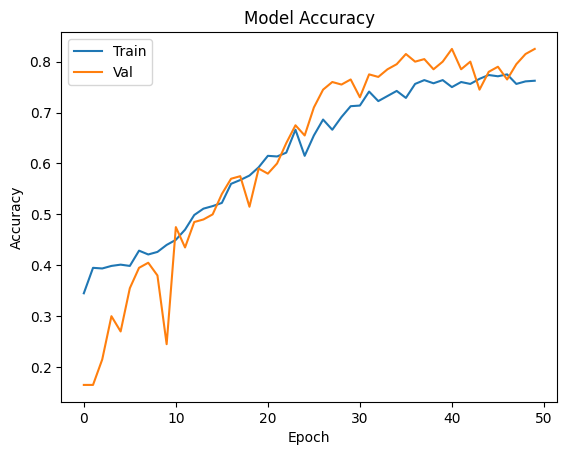

In [40]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [41]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

7/7 [==============================] - 1s 133ms/step - loss: 0.6469 - acc: 0.8250
Accuracy on test set is: 0.824999988079071


In [32]:
X_test

array([[[-3.17795837e+02],
        [ 2.52307510e+00],
        [-3.48772736e+01],
        ...,
        [ 6.35936996e-03],
        [ 8.97062570e-03],
        [ 6.88282354e-03]],

       [[-3.56391815e+02],
        [ 3.65260162e+01],
        [-1.81964245e+01],
        ...,
        [ 2.17308430e-03],
        [ 1.82514125e-03],
        [ 1.63579371e-03]],

       [[-3.43952606e+02],
        [ 4.65079346e+01],
        [-4.19585991e+01],
        ...,
        [ 6.76802825e-03],
        [ 8.26505292e-03],
        [ 7.82518368e-03]],

       ...,

       [[-3.84959015e+02],
        [ 5.01831360e+01],
        [-5.00223503e+01],
        ...,
        [ 3.35291703e-03],
        [ 4.08498757e-03],
        [ 3.81092820e-03]],

       [[-2.76341400e+02],
        [ 4.07193804e+00],
        [-3.12311306e+01],
        ...,
        [ 5.56171918e-03],
        [ 7.71226222e-03],
        [ 6.87744422e-03]],

       [[-2.64965912e+02],
        [-1.04130421e+01],
        [-9.43169708e+01],
        ...,
        

In [33]:
model.predict(X_test)

7/7 [==============================] - 2s 105ms/step


array([[2.49777641e-03, 2.44956766e-03, 8.39676149e-03, 2.68564690e-02,
        9.59799469e-01],
       [2.76201636e-01, 7.23216683e-02, 5.83093345e-01, 3.34434770e-02,
        3.49398442e-02],
       [1.43148601e-01, 9.20668989e-02, 6.94166064e-01, 2.18341891e-02,
        4.87842374e-02],
       [3.46195668e-01, 1.58660650e-01, 4.34594005e-01, 3.23281772e-02,
        2.82214712e-02],
       [2.64228391e-03, 1.82112528e-03, 8.50740541e-03, 1.52369812e-02,
        9.71792161e-01],
       [2.41047889e-01, 7.33188614e-02, 6.42261088e-01, 1.51999593e-02,
        2.81722359e-02],
       [4.01549369e-01, 1.15439855e-02, 5.84020257e-01, 4.15292161e-04,
        2.47112662e-03],
       [2.81279092e-03, 1.22638291e-03, 8.40498600e-03, 7.00746896e-03,
        9.80548382e-01],
       [1.92033678e-01, 6.32747337e-02, 6.55659020e-01, 4.22046222e-02,
        4.68279645e-02],
       [6.79360256e-02, 9.15648460e-01, 4.31502005e-03, 1.03724254e-02,
        1.72806100e-03],
       [4.46915720e-03, 8.5770

In [34]:

# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 1s 83ms/step


array([[36,  3,  8,  0,  1],
       [ 5, 22,  4,  2,  0],
       [ 3,  1, 33,  1,  0],
       [ 0,  2,  5, 37,  0],
       [ 0,  0,  0,  0, 37]])

In [35]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        48
           1       0.79      0.67      0.72        33
           2       0.66      0.87      0.75        38
           3       0.93      0.84      0.88        44
           4       0.97      1.00      0.99        37

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.84      0.82      0.83       200



In [36]:
# save h5
model_uri = '../modelh5/model_LSTM.h5'
model.save(model_uri)

In [37]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 101, 32)           2080      
                                                                 
 lstm_5 (LSTM)               (None, 64)                24832     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)               

In [38]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_114.wav')

1/1 [==============================] - 1s 761ms/step
[0.00421354 0.00984533 0.01678674 0.5139052  0.4552491 ]
3
Predicted class: MVP


In [39]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,-461.970276,76.466766,8.232585,5.376008,3.355752,-14.712471,-14.28373,-11.86776,-7.578109,...,0.000997,0.001009,0.001038,0.001139,0.000566,0.000932,0.000775,0.000444,0.000473,NaN
